https://gogul09.github.io/software/flower-recognition-deep-learning

https://keras.io/applications/#xception

https://www.learnopencv.com/keras-tutorial-transfer-learning-using-pre-trained-models/

https://www.reza.codes/2017-07-29/how-to-train-your-own-dataset-for-coreml/

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

https://www.skcript.com/svr/leveraging-on-transfer-learning-for-image-classification-using-keras/

http://blog.stratospark.com/deep-learning-applied-food-classification-deep-learning-keras.html

http://huboqiang.cn/2017/02/04/CatVsDog

https://deeplearningsandbox.com/how-to-use-transfer-learning-and-fine-tuning-in-keras-and-tensorflow-to-build-an-image-recognition-94b0b02444f2

In [2]:
import os
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
tr_c = os.listdir('./train/cat')
tr_d = os.listdir('./train/dog')

tt_p = os.listdir('./test/')
len(tr_c),len(tr_d), len(tt_p)

(12500, 12500, 12500)

In [4]:
tp, sp = train_test_split(tr_c, test_size=0.1)
len(tp), len(sp)

(11250, 1250)

(389, 499)|(383, 335)|(199, 134)|(499, 375)|(499, 375)|(360, 479)|(251, 180)|(285, 320)|(499, 375)|(395, 297)|(99, 125)|(499, 316)|(400, 338)|(150, 149)|(500, 328)|

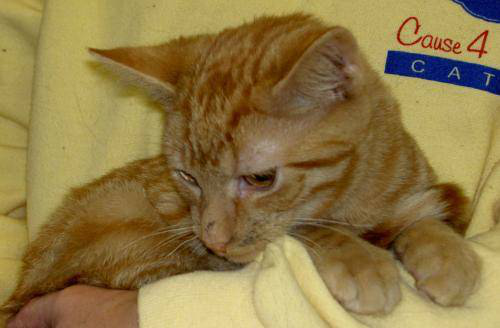

In [5]:
for i in tr_c[:15]:
    pic = Image.open('train/cat/'+i)
    print (pic.size, end='|')
pic

In [6]:
from keras.applications.xception import Xception
from keras.applications.mobilenet import MobileNet

/home/shj16110/anaconda2/envs/3.6.1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
import sys
import os
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as k

In [33]:
# Generate a model with all layers (with top)
model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))

#Add a layer where input is the output of the  second last layer 
# x = Dense(1, activation='sigmoid', name='predictions')(model.layers[-2].output)

#Then create the corresponding model 
# my_model = Model(input=model.input, output=x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [34]:
model.output

<tf.Tensor 'conv_pw_13_relu_5/Minimum:0' shape=(?, 7, 7, 1024) dtype=float32>

In [32]:
model.get_layer('reshape_1').output

<tf.Tensor 'reshape_1_1/Reshape:0' shape=(?, 1, 1, 1024) dtype=float32>

In [23]:
model.get_layer('dropout').output

<tf.Tensor 'dropout_1/cond/Merge:0' shape=(?, 1, 1, 1024) dtype=float32>

In [14]:
# # Generate a model with all layers (with top)
# model = Xception(weights=None, include_top=True, input_shape=(128, 128, 3))

# #Add a layer where input is the output of the  second last layer 
# x = Dense(1, activation='sigmoid', name='predictions')(model.layers[-2].output)

# #Then create the corresponding model 
# my_model = Model(input=model.input, output=x)
# my_model.summary()

In [12]:
MobileNet?

In [11]:
model